# Shapley analysis

Previously we disregarded the centroid information based on the scatter plots, However this is not reliable enough. To fully grasp what metrics are important in LAI prediction we use a shapley analysis. This a game theory based metric.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os
import pandas as pd
from scipy import ndimage
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import shap

In [10]:
def calculate_centroid_and_area(image):
    
    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(img_hsv,(31, 69, 20), (82, 255, 255))
    
    area = np.sum(mask)/255
    centroid = ndimage.center_of_mass(mask)
    
    return [area,centroid]

In [11]:
# Assumes there are an equal number of top and front images
number_of_files = len([name for name in os.listdir('../Images') if name[0]!="."])
number_of_plants = int(number_of_files / 2)

results = pd.DataFrame(columns=['Plant_number', 'Area_front', 'Centroid_front', 'Area_top', 'Centroid_top'])

for x in range(number_of_plants):
    row = []
    
    row.append("Plant" + str(x+1))
    
    image_front = cv2.imread(f'../Images/Plant{x+1}_front_Color.png')
    image_top = cv2.imread(f'../Images/Plant{x+1}_top_Color.png')
    
    front_result = calculate_centroid_and_area(image_front)
    top_result = calculate_centroid_and_area(image_top)
    
    row = row + front_result + top_result
    
    results.loc[len(results)] = row
    

In [12]:
PlantData = pd.read_csv("../PlantData.csv")

In [13]:
Data = results.join(PlantData.set_index('Plant_number'), on='Plant_number')

In [14]:
Data['Centroid_top_x'] = pd.DataFrame(Data['Centroid_top'].tolist(), index=Data.index)[0]
Data['Centroid_top_y'] = pd.DataFrame(Data['Centroid_top'].tolist(), index=Data.index)[1]
Data['Centroid_front_x'] = pd.DataFrame(Data['Centroid_front'].tolist(), index=Data.index)[0]
Data['Centroid_front_y'] = pd.DataFrame(Data['Centroid_front'].tolist(), index=Data.index)[1]
Data

,Plant_number,Area_front,Centroid_front,Area_top,Centroid_top,LAI,Centroid_top_x,Centroid_top_y,Centroid_front_x,Centroid_front_y
0,Plant1,72055.0,"(321.6569009784193, 667.9332315592256)",94829.0,"(267.64921068449524, 690.1139208469983)",720.31,267.649211,690.113921,321.656901,667.933232
1,Plant2,68354.0,"(335.5661702314422, 706.0572607309009)",100518.0,"(307.62608687001335, 672.1429893153465)",843.04,307.626087,672.142989,335.566170,706.057261
2,Plant3,40422.0,"(401.83724209588837, 649.1364850823809)",56632.0,"(347.97875759288036, 682.7761159768329)",486.23,347.978758,682.776116,401.837242,649.136485
3,Plant4,62747.0,"(331.01727572632956, 692.3932937032846)",85578.0,"(332.1322185608451, 682.8729112622403)",826.31,332.132219,682.872911,331.017276,692.393294
4,Plant5,56655.0,"(351.8390433324508, 751.1261671520607)",70593.0,"(325.9290581219101, 603.0834926975763)",755.65,325.929058,603.083493,351.839043,751.126167
5,Plant6,36733.0,"(376.9781667710233, 719.6792802112542)",57026.0,"(381.7719812015572, 630.6437765229895)",750.63,381.771981,630.643777,376.978167,719.679280
6,Plant7,58318.0,"(398.34088960526765, 653.4697691964745)",57342.0,"(311.32932231174357, 742.8072965714485)",492.84,311.329322,742.807297,398.340890,653.469769
7,Plant8,69904.0,"(419.84069581139846, 630.2788395513847)",66562.0,"(314.4042396562603, 742.3711727412037)",797.91,314.404240,742.371173,419.840696,630.278840
8,Plant9,62220.0,"(437.33539054966246, 648.5444069431051)",57761.0,"(318.2378421426222, 730.4825920603868)",609.88,318.237842,730.482592,437.335391,648.544407
9,Plant10,41865.0,"(406.4778693419324, 614.602651379434)",59901.0,"(362.6250980784962, 743.9253267892021)",661.81,362.625098,743.925327,406.477869,614.602651


We also checked the importance of the euclidian distance of the mask from the center of the image but this proved not useful

In [84]:
Eucdisttop = np.zeros(50)
Eucdistfront = np.zeros(50)
for i in range(0,50):
    Eucdisttop[i] = np.linalg.norm(np.array((Data['Centroid_top_x'][i],Data['Centroid_top_y'][i]))-np.array((360,640)))
    Eucdistfront[i] = np.linalg.norm(np.array((Data['Centroid_front_x'][i],Data['Centroid_front_y'][i]))-np.array((360,640)))
Data['Eucdisttop'] = Eucdisttop
Data['Eucdistfront'] = Eucdistfront
Data

,Plant_number,Area_front,Centroid_front,Area_top,Centroid_top,LAI,Centroid_top_x,Centroid_top_y,Centroid_front_x,Centroid_front_y,Eucdisttop,Eucdistfront
0,Plant1,72055.0,"(321.6569009784193, 667.9332315592256)",94829.0,"(267.64921068449524, 690.1139208469983)",720.31,267.649211,690.113921,321.656901,667.933232,105.071753,47.438999
1,Plant2,68354.0,"(335.5661702314422, 706.0572607309009)",100518.0,"(307.62608687001335, 672.1429893153465)",843.04,307.626087,672.142989,335.566170,706.057261,61.450781,70.431341
2,Plant3,40422.0,"(401.83724209588837, 649.1364850823809)",56632.0,"(347.97875759288036, 682.7761159768329)",486.23,347.978758,682.776116,401.837242,649.136485,44.433167,42.823244
3,Plant4,62747.0,"(331.01727572632956, 692.3932937032846)",85578.0,"(332.1322185608451, 682.8729112622403)",826.31,332.132219,682.872911,331.017276,692.393294,51.134135,59.875333
4,Plant5,56655.0,"(351.8390433324508, 751.1261671520607)",70593.0,"(325.9290581219101, 603.0834926975763)",755.65,325.929058,603.083493,351.839043,751.126167,50.236019,111.425429
5,Plant6,36733.0,"(376.9781667710233, 719.6792802112542)",57026.0,"(381.7719812015572, 630.6437765229895)",750.63,381.771981,630.643777,376.978167,719.679280,23.697217,81.468066
6,Plant7,58318.0,"(398.34088960526765, 653.4697691964745)",57342.0,"(311.32932231174357, 742.8072965714485)",492.84,311.329322,742.807297,398.340890,653.469769,113.746099,40.638141
7,Plant8,69904.0,"(419.84069581139846, 630.2788395513847)",66562.0,"(314.4042396562603, 742.3711727412037)",797.91,314.404240,742.371173,419.840696,630.278840,112.066187,60.625158
8,Plant9,62220.0,"(437.33539054966246, 648.5444069431051)",57761.0,"(318.2378421426222, 730.4825920603868)",609.88,318.237842,730.482592,437.335391,648.544407,99.655292,77.805974
9,Plant10,41865.0,"(406.4778693419324, 614.602651379434)",59901.0,"(362.6250980784962, 743.9253267892021)",661.81,362.625098,743.925327,406.477869,614.602651,103.958476,52.964305


In [15]:
# Separate Target Variable and Predictor Variables
TargetVariable=['LAI']
Predictors=['Area_top','Area_front','Centroid_top_x','Centroid_top_y','Centroid_front_x','Centroid_front_y']
 
X=Data[Predictors].values
y=Data[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40, 6)
(40, 1)
(10, 6)
(10, 1)


In [17]:
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=6, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

#extra layer



# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 500, verbose=1)

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 1.0272
Epoch 2/500
2/2 [==============================] - 0s 992us/step - loss: 1.0261
Epoch 3/500
2/2 [==============================] - 0s 460us/step - loss: 1.0247
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 1.0236
Epoch 5/500
2/2 [==============================] - 0s 999us/step - loss: 1.0228
Epoch 6/500
2/2 [==============================] - 0s 501us/step - loss: 1.0219
Epoch 7/500
2/2 [==============================] - 0s 500us/step - loss: 1.0206
Epoch 8/500
2/2 [==============================] - 0s 999us/step - loss: 1.0195
Epoch 9/500
2/2 [==============================] - 0s 996us/step - loss: 1.0187
Epoch 10/500
2/2 [==============================] - 0s 992us/step - loss: 1.0174
Epoch 11/500
2/2 [==============================] - 0s 501us/step - loss: 1.0164
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 1.0147
Epoch 13/500
2/2 [========================

2/2 [==============================] - 0s 500us/step - loss: 0.3253
Epoch 103/500
2/2 [==============================] - 0s 500us/step - loss: 0.3201
Epoch 104/500
2/2 [==============================] - 0s 499us/step - loss: 0.3147
Epoch 105/500
2/2 [==============================] - 0s 499us/step - loss: 0.3098
Epoch 106/500
2/2 [==============================] - 0s 501us/step - loss: 0.3051
Epoch 107/500
2/2 [==============================] - 0s 500us/step - loss: 0.3006
Epoch 108/500
2/2 [==============================] - 0s 500us/step - loss: 0.2960
Epoch 109/500
2/2 [==============================] - 0s 500us/step - loss: 0.2918
Epoch 110/500
2/2 [==============================] - 0s 500us/step - loss: 0.2876
Epoch 111/500
2/2 [==============================] - 0s 500us/step - loss: 0.2834
Epoch 112/500
2/2 [==============================] - 0s 526us/step - loss: 0.2789
Epoch 113/500
2/2 [==============================] - 0s 505us/step - loss: 0.2751
Epoch 114/500
2/2 [===========

2/2 [==============================] - 0s 501us/step - loss: 0.1611
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.1605
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.1601
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.1597
Epoch 206/500
2/2 [==============================] - 0s 501us/step - loss: 0.1590
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.1586
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.1581
Epoch 209/500
2/2 [==============================] - 0s 0s/step - loss: 0.1577
Epoch 210/500
2/2 [==============================] - 0s 499us/step - loss: 0.1572
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.1568
Epoch 212/500
2/2 [==============================] - 0s 498us/step - loss: 0.1565
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.1559
Epoch 214/500
2/2 [==============

2/2 [==============================] - 0s 499us/step - loss: 0.1316
Epoch 303/500
2/2 [==============================] - 0s 500us/step - loss: 0.1314
Epoch 304/500
2/2 [==============================] - 0s 500us/step - loss: 0.1311
Epoch 305/500
2/2 [==============================] - 0s 500us/step - loss: 0.1310
Epoch 306/500
2/2 [==============================] - 0s 0s/step - loss: 0.1307
Epoch 307/500
2/2 [==============================] - 0s 500us/step - loss: 0.1305
Epoch 308/500
2/2 [==============================] - 0s 999us/step - loss: 0.1305
Epoch 309/500
2/2 [==============================] - 0s 1ms/step - loss: 0.1302
Epoch 310/500
2/2 [==============================] - 0s 500us/step - loss: 0.1300
Epoch 311/500
2/2 [==============================] - 0s 501us/step - loss: 0.1298
Epoch 312/500
2/2 [==============================] - 0s 501us/step - loss: 0.1297
Epoch 313/500
2/2 [==============================] - 0s 602us/step - loss: 0.1295
Epoch 314/500
2/2 [================

2/2 [==============================] - 0s 500us/step - loss: 0.1161
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.1160
Epoch 404/500
2/2 [==============================] - 0s 501us/step - loss: 0.1157
Epoch 405/500
2/2 [==============================] - 0s 499us/step - loss: 0.1156
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.1154
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.1153
Epoch 408/500
2/2 [==============================] - 0s 499us/step - loss: 0.1151
Epoch 409/500
2/2 [==============================] - 0s 0s/step - loss: 0.1150
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.1148
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.1147
Epoch 412/500
2/2 [==============================] - 0s 999us/step - loss: 0.1146
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.1144
Epoch 414/500
2/2 [==============

87.09344677734374
   Actuals  Predictions  Plant Numbers
2   964.64   912.791260              1
0  1199.86  1118.720947              2
3  1216.18  1027.340210              3
9  1220.36  1219.550537              4
8  1321.61  1293.903076              5
7  1335.69  1162.023438              6
5  1343.02  1345.205933              7
6  1358.58  1264.010620              8
4  1363.92  1328.711548              9
1  1606.91  1391.949829             10


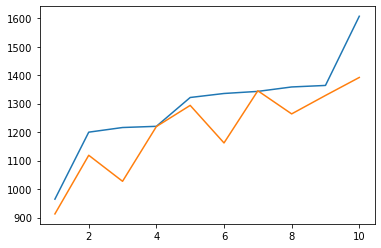

In [18]:
close_predictions = model.predict(X_test)   
close_predictions = TargetVarScalerFit.inverse_transform(close_predictions)
close_predictions = close_predictions.flatten()
y_test = TargetVarScalerFit.inverse_transform(y_test)
y_test = y_test.flatten()
mae = sum(abs(close_predictions - y_test)) / y_test.shape[0]

print(mae)
NN_results = pd.DataFrame(columns = ['Actuals'])
NN_results['Predictions'] = close_predictions
NN_results['Actuals'] = y_test


NN_results.sort_values(by=['Actuals'],inplace = True)
NN_results['Plant Numbers'] = np.arange(1,11).tolist()
print(NN_results)

plt.plot(NN_results['Plant Numbers'],NN_results['Actuals'],NN_results['Plant Numbers'],NN_results['Predictions'])

The Shapley analysis clearly shows that the top area metric is the most important by far for the neural network model, however it also shows that in this model the centroids have some predictive value compared to the area front. Therefore we tested many different input combinations including the centroids, but still the models with only areas show the best performance

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


keras is no longer supported, please use tf.keras instead.


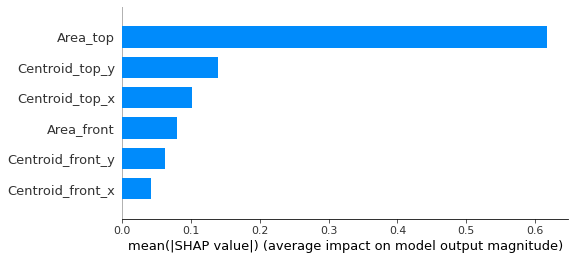

In [19]:
background = X_train[np.random.choice(X_train.shape[0], 40, replace=False)]
explainer = shap.DeepExplainer(model, background)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = ['Area_top','Area_front','Centroid_top_x','Centroid_top_y','Centroid_front_x','Centroid_front_y'])

In [134]:
mae/np.average(NN_results['Actuals'])

0.045055165955410995